# Epidemic modeling, deterministic and stochastic models

In [44]:
import networkx as nx
import numpy as np
from operator import itemgetter
from collections import defaultdict
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## The deterministic SIR model

As a first step, we solve the differential equations of an SIR model with the Euler method. 

We set the parameters of the model

In [46]:
mu = 0.2
R0 = 1.8
beta1 = R0 * mu

In [47]:
beta1

0.36000000000000004

In [48]:
print("The average infectious period is ", 1.0 / mu, " days")

The average infectious period is  5.0  days


The time step of integration is 1 day.

In [49]:
N = 1000000
I = 100
S = N - I
R = 0

St = []
It = []
Rt = []

deltaSt = []
deltaIt = []

St.append(S)
It.append(I)
Rt.append(R)

while I > 0.01:

    deltaSI = beta1 * float(I) * S / N

    deltaIR = mu * I

    S = S - deltaSI
    I = I + deltaSI - deltaIR
    R = R + deltaIR

    deltaSt.append(deltaSI)
    deltaIt.append(deltaIR)
    St.append(S)
    It.append(I)
    Rt.append(R)

In [50]:
print("The final attack rate is ", Rt[-1] / N)

The final attack rate is  0.7424651228152364


We plot the time varying curves of S, I and R

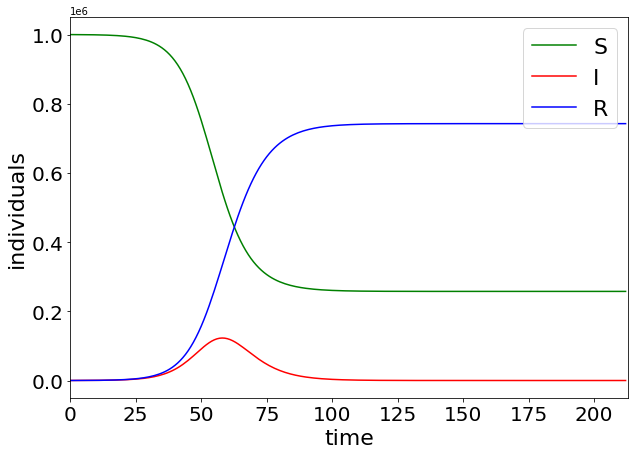

In [54]:
plt.figure(figsize=(10, 7))

plt.plot(range(0, len(St)), np.array(St), label="S", color="g")
plt.plot(range(0, len(It)), np.array(It), label="I", color="r")
plt.plot(range(0, len(Rt)), np.array(Rt), label="R", color="b")

# plt.yscale('log')
# plt.xscale('log')
plt.xlim([0, len(It)])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time", fontsize=22)
plt.ylabel("individuals", fontsize=22)

plt.legend(loc="upper right", fontsize=22)
# plt.yscale('log')
# plt.xscale('log')

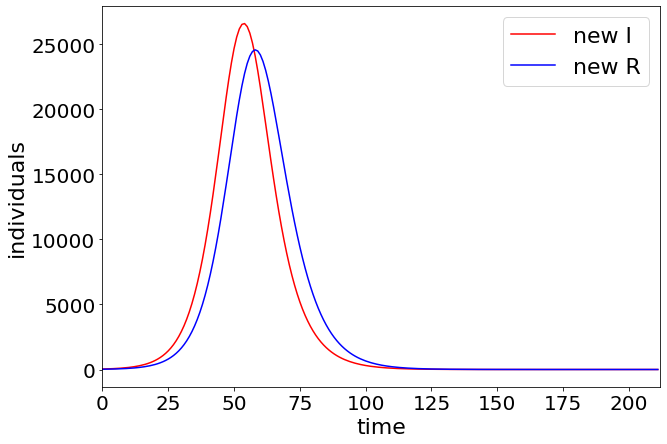

In [55]:
plt.figure(figsize=(10, 7))

plt.plot(range(0, len(deltaSt)), np.array(deltaSt), label="new I", color="r")
plt.plot(range(0, len(deltaIt)), np.array(deltaIt), label="new R", color="b")
# plt.plot(range(0, len(Rt)),np.array(Rt), label='R', color='b')

# plt.yscale('log')
plt.xlim([0, len(deltaIt)])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("time", fontsize=22)
plt.ylabel("individuals", fontsize=22)

plt.legend(loc="upper right", fontsize=22)

## The stochastic SIR

We simulate a discrete and stochastic SIR model by randomly extracting the transition elements at each time step.
Since the simulations are stochastic, we need to run several realizations of the model and then extract their statistical averages.

We use the same model's parameters: $R_0=3.0$

In [75]:
mu = 0.2
R0 =  1.8
beta1 = R0 * mu

In [76]:
dict_I = defaultdict(list)  # here we store the number of I at each time step, for each run

In [77]:
final_R = []

nrun = 1000

Irun = []

for r in range(0, nrun):

    # for each run r, we set the initial conditions
    N = 1000000
    I = 100
    S = N - I
    R = 0

    list_I = []
    list_I.append(I)

    t = 0
    dict_I[t].append(I)

    while I > 0:

        p = beta1 * (float(I) / N)
        deltaSI = np.random.binomial(S, p)

        deltaIR = np.random.binomial(I, mu)

        S = S - deltaSI
        I = I + deltaSI - deltaIR
        R = R + deltaIR

        t += 1
        list_I.append(I)

        dict_I[t].append(I)

    final_R.append(float(R) / N)
    Irun.append(list_I)

print("The average final attack rate is ", np.average(np.array(final_R)))

The average final attack rate is  0.742447461


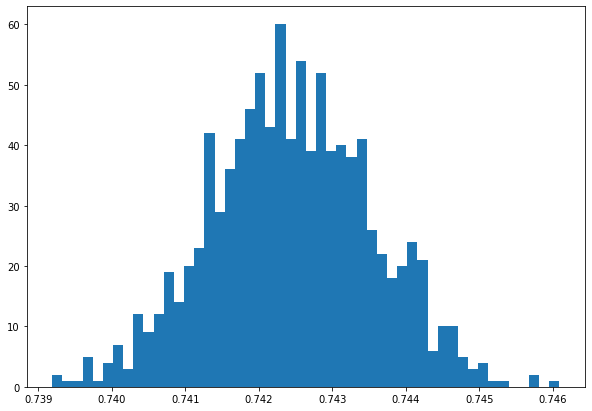

In [78]:
plt.figure(figsize=(10, 7))
a = plt.hist(final_R, bins=50)

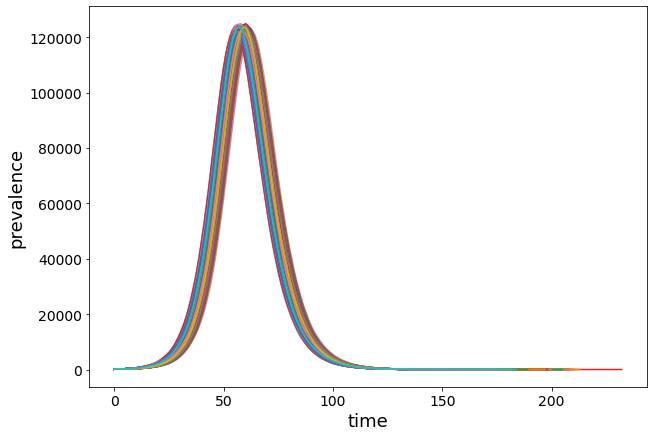

In [79]:
plt.figure(figsize=(10, 7))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("time", fontsize=18)
plt.ylabel("prevalence", fontsize=18)

for r in Irun:

    plt.plot(range(0, len(r)), r)

Too many lines are messy... let's draw a boxplot

(20.0, 60.0)

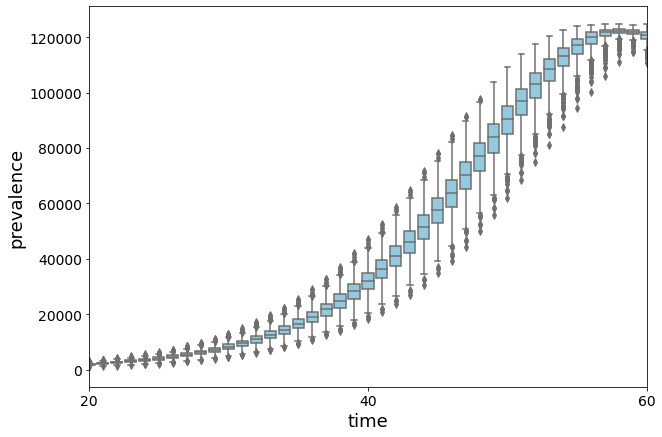

In [80]:
full_array = [np.array(dict_I[t]) for t in dict_I]

plt.figure(figsize=(10, 7))

plt.xlabel("time", fontsize=18)
plt.ylabel("prevalence", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = sns.boxplot(data=full_array, color="skyblue")

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([20, 60])
# plt.show()

Let's compare the result with the deterministic simulation by computing the average prevalence of the stochastic version.


In [81]:
full_average = [np.average(np.array(dict_I[t])) for t in dict_I]

(40.0, 60.0)

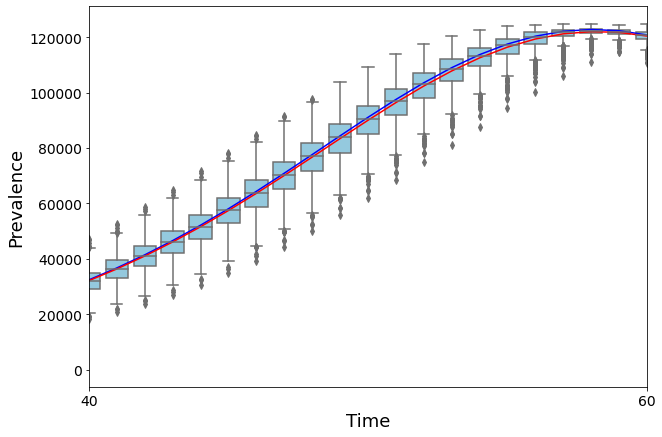

In [82]:
plt.figure(figsize=(10, 7))

plt.xlabel("Time", fontsize=18)
plt.ylabel("Prevalence", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = sns.boxplot(data=full_array, color="skyblue")

plt.plot(range(0, len(It)), It, color="b")
plt.plot(range(0, len(full_average)), full_average, color="r")

ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim([40,60])
# plt.show()

### Dependence on the initial conditions

The results of the stochastic version of the model depend on the initial conditions. 
Let's change the initial number of infected individuals to 1.

In [83]:
mu = 0.2
R0 = 3.0
beta1 = R0 * mu

In [84]:
dict_I = defaultdict(
    list
)  # here we store the number of I at each time step, for each run

final_R = []

nrun = 1000
Irun = []
for r in range(0, nrun):

    # for each run r, we set the initial conditions
    N = 1000000
    I = 1
    S = N - I
    R = 0

    list_I = []

    t = 0
    dict_I[t].append(I)
    while I > 0:

        p = beta1 * (float(I) / N)
        deltaSI = np.random.binomial(S, p)

        deltaIR = np.random.binomial(I, mu)

        S = S - deltaSI
        I = I + deltaSI - deltaIR
        R = R + deltaIR

        t += 1
        list_I.append(I)

        dict_I[t].append(I)

    final_R.append(float(R) / N)
    Irun.append(list_I)

print("The average final attack rate is ", np.average(np.array(final_R)))

The average final attack rate is  0.7025336569999999


**With only 1 infected as a seed, we see more fluctuations, as expected.**

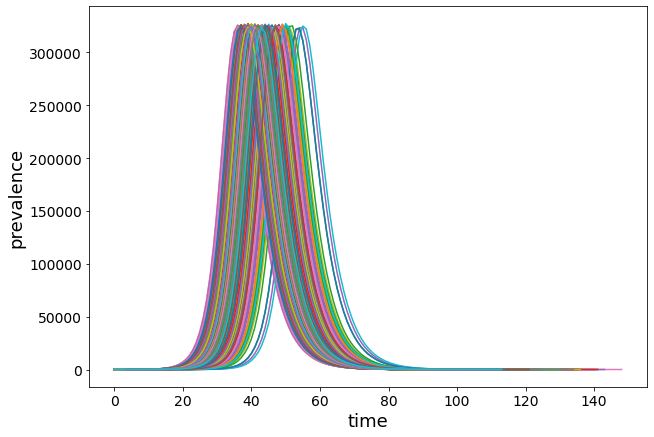

In [85]:
plt.figure(figsize=(10, 7))
plt.xlabel("time", fontsize=18)
plt.ylabel("prevalence", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for r in Irun:

    plt.plot(range(0, len(r)), r)

**We have several runs without outbreak!**  
The initial seed individual recovers before infecting someone else.

In [86]:
no_outbreak = []
for r in final_R:
    if r < 0.8:
        no_outbreak.append(r * 1000000)
print(no_outbreak)

[1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 6.0, 3.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 2.0, 1.0, 1.0,

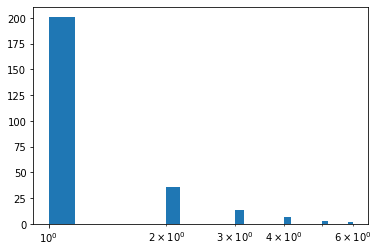

In [87]:
b = plt.hist(no_outbreak, bins=30)
plt.xscale("log")

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

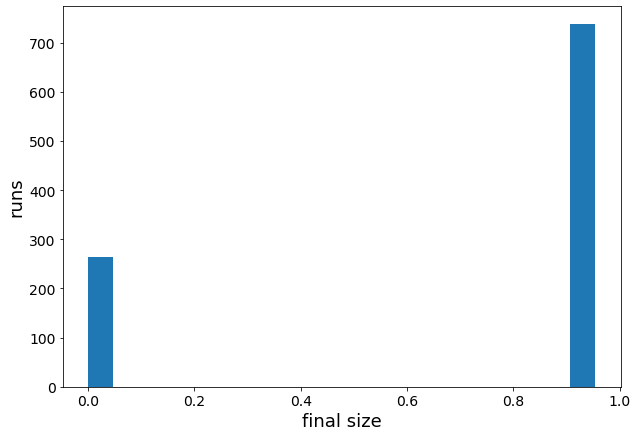

In [88]:
plt.figure(figsize=(10, 7))
plt.hist(final_R, 20)
plt.xlabel("final size", fontsize=18)
plt.ylabel("runs", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [89]:
len(no_outbreak)

263

In a stochastic SIR model, the probability of an outbreak is equal to 
<center>
$p_{outb}=1-(\frac{1}{R_0})^{I_0}$
</center>

In [90]:
p_outbreak = 1 - 1 / R0

In [91]:
p_outbreak

0.6666666666666667

Of course, such fluctuations do not affect the deterministic model, where the outcome is fixed. 

In [92]:
N = 10000
I = 1
S = N - I
R = 0


St = []
It = []
Rt = []

St.append(S)
It.append(I)
Rt.append(R)

while I > 0.5:
    deltaSI = beta1 * (float(I) * float(S) / N)
    deltaIR = mu * I

    S = S - deltaSI
    I = I + deltaSI - deltaIR
    R = R + deltaIR

    St.append(S)
    It.append(I)
    Rt.append(R)

In [93]:
print("The final attack rate is ", Rt[-1] / N)

The final attack rate is  0.9531700082169579


---
# Epidemics on networks

## Stochastic SIR on the US airport network

In [94]:
airport_path = "./../datasets/USairport_2010.txt"
meta_path = "./../datasets/USairport_2010_codes.txt"

In [95]:
G = nx.Graph()
fh = open(airport_path, "r")
for line in fh.readlines():
    s = line.strip().split()
    G.add_edge(int(s[0]), int(s[1]))
fh.close()

In [96]:
G.code = {}
G.name = {}
G.pos = {}

lons = []
lats = []

finfo = open(meta_path, "r")
for line in finfo.readlines():
    s = line.strip().split()
    node = int(s[0])

    lon = float(s[4])
    lat = float(s[3])

    G.code[node] = s[1]
    G.name[node] = s[2]
    G.pos[node] = [lon, lat]

    lons.append(lon)
    lats.append(lat)
finfo.close()

In [97]:
# disease parameters
mu = 0.2  # infectious period
lambd = 0.01  # probability of infection given a contact

In [98]:
# we need to store the disease status of each node
G.disease_status = {}  # S=0, I=1, R=-1

infected_nodes = []  # list of infected nodes

In [99]:
# let's choose a seed
node_list = []

deg = dict(G.degree())
for i in sorted(deg.items(), key=itemgetter(1)):
    node_list.append(i[0])
seed = node_list[-1]

print("The seed is", G.name[seed])
print("The degree of the seed is", G.degree(seed))

The seed is Denver
The degree of the seed is 192


In [100]:
seed

389

In [101]:
# initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n] = 1
        # infected
    else:
        G.disease_status[n] = 0
        # susceptible

In [102]:
I_net = []

while len(infected_nodes) > 0:

    # transmission
    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j] == 0:
                p = np.random.random()
                if p < lambd:
                    G.disease_status[j] = 1

    # recovery
    for k in infected_nodes:
        p = np.random.random()
        if p < mu:
            G.disease_status[k] = -1

    # update of disease status
    infected_nodes = []
    for n in G.nodes():
        if G.disease_status[n] == 1:
            infected_nodes.append(n)

    # store output
    I_net.append(len(infected_nodes))

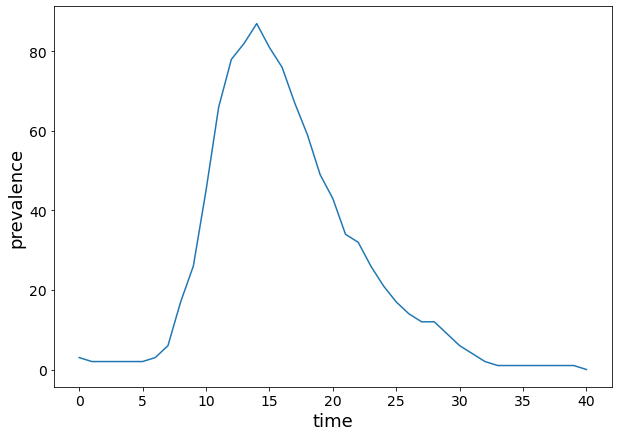

In [103]:
plt.figure(figsize=(10, 7))

plt.xlabel("time", fontsize=18)
plt.ylabel("prevalence", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(range(0, len(I_net)), I_net)

In [104]:
recovered = 0
for n in G.nodes():
    if G.disease_status[n] == -1:
        recovered += 1

print("The total number of infected nodes is", recovered)
print("The final attack rate is", recovered / len(G.nodes()))

The total number of infected nodes is 216
The final attack rate is 0.5333333333333333


## Visualize the infection spread on the network

In [105]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [106]:
shape_path = "./../datasets/shapefiles/USA_shape.shp"

In [107]:
ls ./../shapefiles/

ls: ./../shapefiles/: No such file or directory


In [108]:
# we need to store the disease status of each node
G.disease_status = {}  # S=0, I=1, R=-1

infected_nodes = []  # list of infected nodes

In [109]:
# initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n] = 1
        # infected
    else:
        G.disease_status[n] = 0
        # susceptible

In [110]:
t = 0
node_color = [G.disease_status[v] for v in G]  # color code on disease status

## Import the shapefile of the USA

In [111]:
usa = gpd.read_file(shape_path)

<AxesSubplot:>

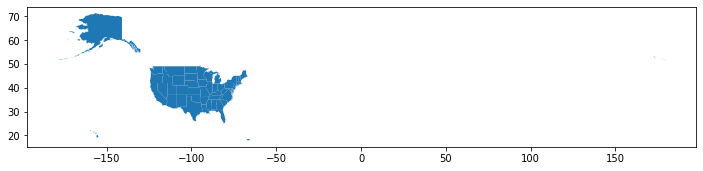

In [112]:
usa.plot(figsize=(12, 7))

In [ ]:
usa.head()

In [ ]:
usa_cont = usa[
    (usa.NAME != "Alaska") & (usa.NAME != "Hawaii") & (usa.NAME != "Puerto Rico")
]

In [ ]:
usa_cont.head()

In [ ]:
usa_cont.plot(figsize=(12, 7))

In [ ]:
usa_cont.crs

In [ ]:
usa_cont_alb = usa_cont.to_crs({"init": "epsg:4326"}) #epsg:4326 esri:102003

In [ ]:
usa_cont_alb.head()

In [ ]:
ax = usa_cont_alb.plot(figsize=(12, 7), alpha=0.8)

In [ ]:
from pyproj import Proj, transform

In [ ]:
df = pd.read_csv(meta_path, sep=" ")

In [ ]:
df

In [ ]:
geo = [Point(xy) for xy in zip(df.lon, df.lat)]
crs = {"init": "epsg:4326"}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geo)

In [ ]:
geo_df.crs

In [ ]:
geo_df.plot(figsize=(10, 7))

In [ ]:
original = Proj(geo_df.crs)  # EPSG:4326 in your case
destination = Proj(init="esri:102003")  # your new proj

In [ ]:
G.pos_new = {}
for node in G:

    long, lat = G.pos[node]
    x, y = transform(original, destination, long, lat)

    G.pos_new[node] = (x, y)

In [ ]:
ax = usa_cont_alb.plot(figsize=(12, 7), alpha=0.7)
nx.draw_networkx_nodes(
    G,
    pos=G.pos_new,
    node_size=30,
    node_color=node_color,
    cmap=plt.cm.RdBu_r,
    vmin=-1,
    vmax=1,
)

In [ ]:
while len(infected_nodes) > 0 and t < 15:

    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j] == 0:
                p = np.random.random()
                if p < lambd:
                    G.disease_status[j] = 1

    for k in infected_nodes:
        p = np.random.random()
        if p < mu:
            G.disease_status[k] = -1

    infected_nodes = []
    for n in G.nodes():
        if G.disease_status[n] == 1:
            infected_nodes.append(n)

    t += 1
    node_color = [G.disease_status[v] for v in G]  # color code on disease status

    plt.figure(figsize=(12, 7))
    ax = usa_cont_alb.plot(figsize=(12, 7), alpha=0.7)
    nx.draw_networkx_nodes(
        G,
        pos=G.pos_new,
        node_size=30,
        node_color=node_color,
        cmap=plt.cm.RdBu_r,
        vmin=-1,
        vmax=1,
    )

    # plt.savefig('./spreading_SIR_snapshot_time_'+str(t)+'.png')